In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Election2020_keyword File

### Schema Summary

- `id_str`: set as index
- `from_user`: user id 
- `text`: hard to encode, need more info
- `created_at` & `time`: convert to `datetime`, similar data except different time zone 
- `geo_coordinates`: drop (due to empty)
- `user_lang`: drop
- `in_reply_to_user_id_str`: drop
- `in_reply_to_screen_name`: drop
- `in_reply_to_status_id_str`: drop
- `source`: extract the text from url
- `profile_image_url`: not sure how to use
- `user_followers_count`: integer, clean data
- `user_friends_count`: integer, clean data
- `user_location`: messy, need more effort to clean
- `entities_str`: json/dict, need more information to encode

In [2]:
df = pd.read_excel('Election2020_keyword.xlsx')

In [3]:
df.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str'],
      dtype='object')

In [4]:
df = df.convert_dtypes()

In [5]:
df.dtypes

id_str                                Int64
from_user                            string
text                                 string
created_at                           string
time                         datetime64[ns]
geo_coordinates                       Int64
user_lang                             Int64
in_reply_to_user_id_str               Int64
in_reply_to_screen_name              string
from_user_id_str                      Int64
in_reply_to_status_id_str             Int64
source                               string
profile_image_url                    string
user_followers_count                  Int64
user_friends_count                    Int64
user_location                        string
status_url                           string
entities_str                         string
dtype: object

In [6]:
df.set_index('id_str', inplace=True)

In [7]:
df.from_user.unique()

<StringArray>
[  'ErdenebulganB',     'smartjirgee',    'enkhtemuulen',   'CoverMongolia',
          'iaacmn',       'e_namsrai',        'Mirmishk',   'GalSukhbaatar',
       'altanalim',         'chimeg4',
 ...
     'Enkhsoyombo',  'Davaajargal_DD', 'Bayarkhuu_japan',     'Baatarsukh7',
   'urnaa_urnaa11',          'bukufy',      'SainbuyanM',       'borjigonB',
     'BatkhishigS',      'Munhuyanga']
Length: 1918, dtype: string

### Time 
`created_at` and `time`

* assumption: same time except different time zone (one hour diff)

In [8]:
df['created_at_datetime'] = pd.to_datetime(df['created_at'])

In [9]:
df['time']

id_str
1281604035506606080   2020-07-10 15:59:47
1281048883578077185   2020-07-09 03:13:49
1280902480461615106   2020-07-08 17:32:04
1280345217271357440   2020-07-07 04:37:42
1280304124207091714   2020-07-07 01:54:24
                              ...        
1269398002931650560   2020-06-06 23:37:22
1269369617945788418   2020-06-06 21:44:35
1269334276287287296   2020-06-06 19:24:09
1269332511362109441   2020-06-06 19:17:08
1269332511362109441   2020-06-06 19:17:08
Name: time, Length: 4975, dtype: datetime64[ns]

In [10]:
df['created_at_datetime']

id_str
1281604035506606080   2020-07-10 14:59:47+00:00
1281048883578077185   2020-07-09 02:13:49+00:00
1280902480461615106   2020-07-08 16:32:04+00:00
1280345217271357440   2020-07-07 03:37:42+00:00
1280304124207091714   2020-07-07 00:54:24+00:00
                                 ...           
1269398002931650560   2020-06-06 22:37:22+00:00
1269369617945788418   2020-06-06 20:44:35+00:00
1269334276287287296   2020-06-06 18:24:09+00:00
1269332511362109441   2020-06-06 18:17:08+00:00
1269332511362109441   2020-06-06 18:17:08+00:00
Name: created_at_datetime, Length: 4975, dtype: datetime64[ns, UTC]

### Null 

drop columns: `geo_coordinates`, `user_lang`, `in_reply_to_user_id_str`, `in_reply_to_screen_name`, `in_reply_to_status_id_str`, due to large scale of empty

In [11]:
df.isnull().mean()

from_user                    0.000000
text                         0.000000
created_at                   0.000000
time                         0.000000
geo_coordinates              1.000000
user_lang                    1.000000
in_reply_to_user_id_str      0.987940
in_reply_to_screen_name      0.987940
from_user_id_str             0.000000
in_reply_to_status_id_str    0.988342
source                       0.000000
profile_image_url            0.000000
user_followers_count         0.002412
user_friends_count           0.001005
user_location                0.299698
status_url                   0.000000
entities_str                 0.000000
created_at_datetime          0.000000
dtype: float64

In [12]:
df.drop(df.columns[(df.isnull().mean() > 0.8)], axis=1, inplace=True)

In [13]:
df.isnull().sum()

from_user                  0
text                       0
created_at                 0
time                       0
from_user_id_str           0
source                     0
profile_image_url          0
user_followers_count      12
user_friends_count         5
user_location           1491
status_url                 0
entities_str               0
created_at_datetime        0
dtype: int64

#### from_user_id_str

* ??? `from_user_id_str` uncleared

In [14]:
df['from_user_id_str']

id_str
1281604035506606080             1433166162
1281048883578077185    1279233665608769538
1280902480461615106              132748835
1280345217271357440              483486676
1280304124207091714    1264912426937405440
                              ...         
1269398002931650560               24906585
1269369617945788418              610515084
1269334276287287296    1117288242305323008
1269332511362109441              136117682
1269332511362109441              136117682
Name: from_user_id_str, Length: 4975, dtype: Int64

In [15]:
df[df['from_user_id_str'] == df.index]

,from_user,text,created_at,time,from_user_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,created_at_datetime
id_str,,,,,,,,,,,,,


In [16]:
df['source_txt'] = df.source.str.findall('\>(.+)\<').apply(lambda x: x[0] if x else '')

In [17]:
df.source_txt.isnull().sum()

0

In [18]:
df.source_txt.value_counts()

Twitter for iPhone      2046
Twitter for Android     1937
Twitter Web App          856
Twitter for iPad          61
TweetDeck                 41
botmn                     20
Hatena Blog / はてなブログ       6
SocialFlow                 3
Tweetbot for iΟS           1
Twidere for Android        1
IFTTT                      1
RRasdasdasdas              1
Instagram                  1
Name: source_txt, dtype: int64

In [19]:
df

,from_user,text,created_at,time,from_user_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,created_at_datetime,source_txt
id_str,,,,,,,,,,,,,,
1281604035506606080,ErdenebulganB,65 vs. 62 #УИХ #МАН #суперолонх #УлсТөр #сонгу...,Fri Jul 10 14:59:47 +0000 2020,2020-07-10 15:59:47,1433166162,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1279424686...,14828,7943,<NA>,http://twitter.com/ErdenebulganB/statuses/1281...,"{""hashtags"":[{""text"":""УИХ"",""indices"":[10,14]},...",2020-07-10 14:59:47+00:00,Twitter Web App
1281048883578077185,smartjirgee,RT @jdierkes: MPP cld rely on 220k members to ...,Thu Jul 09 02:13:49 +0000 2020,2020-07-09 03:13:49,1279233665608769538,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1279237367...,570,1965,Ulaanbaatar Mongolia,http://twitter.com/smartjirgee/statuses/128104...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2020-07-09 02:13:49+00:00,Twitter for iPhone
1280902480461615106,enkhtemuulen,У нас тоже #сонгууль2020 😂 https://t.co/90294p...,Wed Jul 08 16:32:04 +0000 2020,2020-07-08 17:32:04,132748835,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/1263348467...,2661,1063,Mongolia,http://twitter.com/enkhtemuulen/statuses/12809...,"{""hashtags"":[{""text"":""сонгууль2020"",""indices"":...",2020-07-08 16:32:04+00:00,Twitter for iPad
1280345217271357440,CoverMongolia,RT @jdierkes: MPP cld rely on 220k members to ...,Tue Jul 07 03:37:42 +0000 2020,2020-07-07 04:37:42,483486676,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/6659580228...,48160,48643,"Ulaanbaatar, Mongolia",http://twitter.com/CoverMongolia/statuses/1280...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2020-07-07 03:37:42+00:00,Twitter Web App
1280304124207091714,iaacmn,RT @Batbayasgalan: Төрийн минь #Сүлд өршөө! 🇲🇳...,Tue Jul 07 00:54:24 +0000 2020,2020-07-07 01:54:24,1264912426937405440,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1264913233...,90,231,Ulaanbaatar,http://twitter.com/iaacmn/statuses/12803041242...,"{""hashtags"":[{""text"":""Сүлд"",""indices"":[31,36]}...",2020-07-07 00:54:24+00:00,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269398002931650560,jdierkes,W/ most recent post updating list of parties &...,Sat Jun 06 22:37:22 +0000 2020,2020-06-06 23:37:22,24906585,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/9598923436...,6168,1202,"Vancouver, British Columbia",http://twitter.com/jdierkes/statuses/126939800...,"{""hashtags"":[{""text"":""Сонгууль2020"",""indices"":...",2020-06-06 22:37:22+00:00,Twitter Web App
1269369617945788418,chbudee,Нөгөө өндөгнүүдийг унагааж бгаа бичлэг нь бас ...,Sat Jun 06 20:44:35 +0000 2020,2020-06-06 21:44:35,610515084,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1069254890...,1300,2290,<NA>,http://twitter.com/chbudee/statuses/1269369617...,"{""hashtags"":[{""text"":""Сонгууль2020"",""indices"":...",2020-06-06 20:44:35+00:00,Twitter for Android
1269334276287287296,zaya_ari,"Ханиа зөв сонго, ханиа л зөв сонго гэх юм. 76...",Sat Jun 06 18:24:09 +0000 2020,2020-06-06 19:24:09,1117288242305323008,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1259675553...,1028,735,Mongolia,http://twitter.com/zaya_ari/statuses/126933427...,"{""hashtags"":[{""text"":""Сонгууль2020"",""indices"":...",2020-06-06 18:24:09+00:00,Twitter for Android


In [20]:
df.source_txt.value_counts().cumsum() / len(df)

Twitter for iPhone      0.411256
Twitter for Android     0.800603
Twitter Web App         0.972663
Twitter for iPad        0.984925
TweetDeck               0.993166
botmn                   0.997186
Hatena Blog / はてなブログ    0.998392
SocialFlow              0.998995
Tweetbot for iΟS        0.999196
Twidere for Android     0.999397
IFTTT                   0.999598
RRasdasdasdas           0.999799
Instagram               1.000000
Name: source_txt, dtype: float64

In [21]:
df['user_location'].value_counts()

Mongolia                       1139
Ulaanbaatar, Mongolia           395
Ulaanbaatar                     229
Vancouver, British Columbia      88
Улаанбаатар                      82
                               ... 
монгол улс                        1
Mongolia.UB                       1
Don't try.                        1
Улаанбаатар                       1
Монголия                          1
Name: user_location, Length: 343, dtype: Int64

In [22]:
df['user_location'].unique()

<StringArray>
[                            <NA>,           'Ulaanbaatar Mongolia',
                       'Mongolia',          'Ulaanbaatar, Mongolia',
                    'Ulaanbaatar',                     'London, UK',
            'Ulaanbaatar, Huhhot', 'My very personal views & ideas',
    'Vancouver, British Columbia',                    'ulaanbaatar',
 ...
                       'anywhere',                    'Mongolia.UB',
    'Ulaanbaatar city, Mongolia ',            'UB, London, Geneve,',
                   'Tel 90116343',                        'Steppes',
             'Дорноговь Сайншанд',          'Mongolia Ulaanbaatar ',
                  'Paris, France',                            'Sky']
Length: 344, dtype: string

In [23]:
df['user_location'].isnull().mean()

0.29969849246231156

In [24]:
df[df['user_location'].isnull()]

,from_user,text,created_at,time,from_user_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,created_at_datetime,source_txt
id_str,,,,,,,,,,,,,,
1281604035506606080,ErdenebulganB,65 vs. 62 #УИХ #МАН #суперолонх #УлсТөр #сонгу...,Fri Jul 10 14:59:47 +0000 2020,2020-07-10 15:59:47,1433166162,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1279424686...,14828,7943,<NA>,http://twitter.com/ErdenebulganB/statuses/1281...,"{""hashtags"":[{""text"":""УИХ"",""indices"":[10,14]},...",2020-07-10 14:59:47+00:00,Twitter Web App
1280050710545981440,GalSukhbaatar,RT @altanalim: Халдашгүй байдлын д/х мэдэгдэл ...,Mon Jul 06 08:07:26 +0000 2020,2020-07-06 09:07:26,236392720,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1161576675...,1557,1595,<NA>,http://twitter.com/GalSukhbaatar/statuses/1280...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2020-07-06 08:07:26+00:00,Twitter Web App
1279986817547120641,Puuujeee2,RT @jdierkes: MPP cld rely on 220k members to ...,Mon Jul 06 03:53:32 +0000 2020,2020-07-06 04:53:32,967805909069053952,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1278374496...,87,165,<NA>,http://twitter.com/Puuujeee2/statuses/12799868...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2020-07-06 03:53:32+00:00,Twitter for Android
1279985026549993472,enhtsetseg,RT @jdierkes: MPP cld rely on 220k members to ...,Mon Jul 06 03:46:25 +0000 2020,2020-07-06 04:46:25,68575439,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/2956321732...,2170,823,<NA>,http://twitter.com/enhtsetseg/statuses/1279985...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2020-07-06 03:46:25+00:00,Twitter for iPhone
1279645512728064000,tsasmusus,RT @jdierkes: Most recent parliamentary electi...,Sun Jul 05 05:17:19 +0000 2020,2020-07-05 06:17:19,137652430,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1187102734...,329,673,<NA>,http://twitter.com/tsasmusus/statuses/12796455...,"{""hashtags"":[{""text"":""Mongolia"",""indices"":[52,...",2020-07-05 05:17:19+00:00,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269468026337816576,ulziitse,RT @ArdiinNam: МЭДЭГДЭЛ https://t.co/BNmf1KK8S...,Sun Jun 07 03:15:37 +0000 2020,2020-06-07 04:15:37,3747111980,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1264934332...,9927,3824,<NA>,http://twitter.com/ulziitse/statuses/126946802...,"{""hashtags"":[{""text"":""Сонгууль2020"",""indices"":...",2020-06-07 03:15:37+00:00,Twitter for Android
1269465967991504896,tserenpuntsagt,Өчигдөр лагер дээр гал түлэхэд хэрэг болсон нэ...,Sun Jun 07 03:07:26 +0000 2020,2020-06-07 04:07:26,1339550076,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1251843646...,1233,1298,<NA>,http://twitter.com/tserenpuntsagt/statuses/126...,"{""hashtags"":[{""text"":""сонгууль2020"",""indices"":...",2020-06-07 03:07:26+00:00,Twitter for Android
1269453468818759687,TuulZav,RT @oyunsuren: Эрдэмд оройгүй гэдэг. Ийм биеэ ...,Sun Jun 07 02:17:46 +0000 2020,2020-06-07 03:17:46,3289666861,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/6245177834...,4637,5073,<NA>,http://twitter.com/TuulZav/statuses/1269453468...,"{""hashtags"":[{""text"":""Сонгууль2020"",""indices"":...",2020-06-07 02:17:46+00:00,Twitter for Android


#### status_url

`status_url` contains the same information as `from_user`

In [25]:
(df['status_url'].str.split(r'\/').apply(lambda x: x[3] if x else '') == df['from_user']).sum()

4975

In [26]:
df.drop('status_url', axis=1, inplace=True)

In [27]:
df.head()

,from_user,text,created_at,time,from_user_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,entities_str,created_at_datetime,source_txt
id_str,,,,,,,,,,,,,
1281604035506606080,ErdenebulganB,65 vs. 62 #УИХ #МАН #суперолонх #УлсТөр #сонгу...,Fri Jul 10 14:59:47 +0000 2020,2020-07-10 15:59:47,1433166162,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1279424686...,14828,7943,<NA>,"{""hashtags"":[{""text"":""УИХ"",""indices"":[10,14]},...",2020-07-10 14:59:47+00:00,Twitter Web App
1281048883578077185,smartjirgee,RT @jdierkes: MPP cld rely on 220k members to ...,Thu Jul 09 02:13:49 +0000 2020,2020-07-09 03:13:49,1279233665608769538,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1279237367...,570,1965,Ulaanbaatar Mongolia,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2020-07-09 02:13:49+00:00,Twitter for iPhone
1280902480461615106,enkhtemuulen,У нас тоже #сонгууль2020 😂 https://t.co/90294p...,Wed Jul 08 16:32:04 +0000 2020,2020-07-08 17:32:04,132748835,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/1263348467...,2661,1063,Mongolia,"{""hashtags"":[{""text"":""сонгууль2020"",""indices"":...",2020-07-08 16:32:04+00:00,Twitter for iPad
1280345217271357440,CoverMongolia,RT @jdierkes: MPP cld rely on 220k members to ...,Tue Jul 07 03:37:42 +0000 2020,2020-07-07 04:37:42,483486676,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/6659580228...,48160,48643,"Ulaanbaatar, Mongolia","{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2020-07-07 03:37:42+00:00,Twitter Web App
1280304124207091714,iaacmn,RT @Batbayasgalan: Төрийн минь #Сүлд өршөө! 🇲🇳...,Tue Jul 07 00:54:24 +0000 2020,2020-07-07 01:54:24,1264912426937405440,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1264913233...,90,231,Ulaanbaatar,"{""hashtags"":[{""text"":""Сүлд"",""indices"":[31,36]}...",2020-07-07 00:54:24+00:00,Twitter Web App


In [28]:
df.groupby(['user_location']).size().reset_index(name='count').sort_values(['count'], ascending=False)


,user_location,count
87,Mongolia,1139
217,"Ulaanbaatar, Mongolia",395
203,Ulaanbaatar,229
232,"Vancouver, British Columbia",88
302,Улаанбаатар,82
...,...,...
108,Mongolia. Ulaanbaatar,1
104,"Mongolia,Erdenet city",1
228,United Mongolian Nation,1
101,"Mongolia, Singapore",1


### Basic EDA

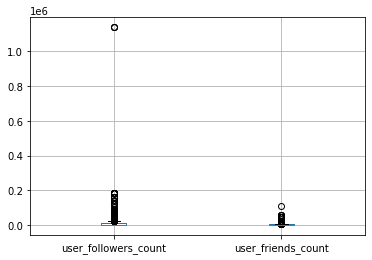

In [29]:
boxplot = df.boxplot(column=['user_followers_count', 'user_friends_count'])

Outliers exist

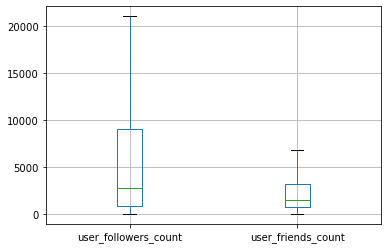

In [30]:
boxplot = df.boxplot(column=['user_followers_count', 'user_friends_count'], showfliers=False)

Larger range for user_followers_count

# DP File

### Basic Information

In [31]:
df = pd.read_excel('Election2020_keyword.xlsx')
df_dp = pd.read_excel('DP.xlsx')

In [32]:
df_dp.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str'],
      dtype='object')

In [33]:
df_dp.size

143028

Check if DP and Election2020_keyword excel sheets have the same columns.

In [34]:
all(df_dp.columns == df.columns)

True

In [35]:
len(df_dp.from_user.unique())

3744

### Null

In [36]:
df_dp.isnull().mean()

id_str                       0.000000
from_user                    0.000000
text                         0.000000
created_at                   0.000000
time                         0.000000
geo_coordinates              0.999748
user_lang                    1.000000
in_reply_to_user_id_str      0.823685
in_reply_to_screen_name      0.823685
from_user_id_str             0.000000
in_reply_to_status_id_str    0.824818
source                       0.000000
profile_image_url            0.000000
user_followers_count         0.002014
user_friends_count           0.001888
user_location                0.415555
status_url                   0.000000
entities_str                 0.000000
dtype: float64

In [37]:
df_dp.drop(df_dp.columns[(df_dp.isnull().mean() > 0.8)], axis=1, inplace=True)

In [38]:
df_dp.isnull().sum()

id_str                     0
from_user                  0
text                       0
created_at                 0
time                       0
from_user_id_str           0
source                     0
profile_image_url          0
user_followers_count      16
user_friends_count        15
user_location           3302
status_url                 0
entities_str               0
dtype: int64

### Source Txt

In [39]:
df_dp['source_txt'] = df_dp.source.str.findall('\>(.+)\<').apply(lambda x: x[0] if x else '')

In [40]:
df_dp.source_txt.value_counts()

Twitter for Android                3689
Twitter for iPhone                 2523
Twitter Web App                    1431
Twitter for iPad                    157
botmn                                57
TweetDeck                            16
IFTTT                                 8
NovaPress Publisher                   7
News.mn.mn                            6
dlvr.it                               5
WordPress.com                         5
SEOLIT Publisher                      3
Instagram                             3
ksp1_add                              2
SMMplanner                            2
Turkarama Post                        2
LiveJournal.com                       2
Google                                2
ikon CMS - auto tweet                 2
WordGena_AutoPost                     2
Buffer                                1
Talon Android                         1
NewsVLRu                              1
shareOn5                              1
Calend.ru for posting                 1


More sources than Election2020_keyword

### Basic EDA

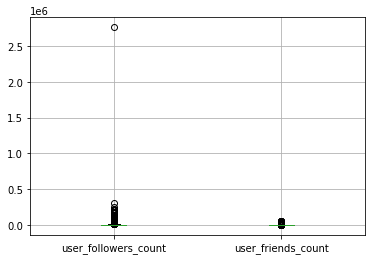

In [41]:
boxplot1 = df_dp.boxplot(column=['user_followers_count', 'user_friends_count'])

Outliers exist espcially for user_foloowers_count

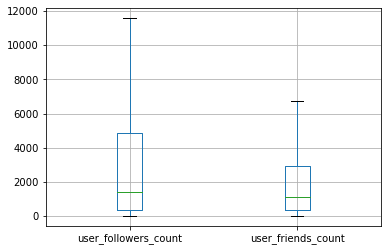

In [42]:
boxplot1 = df_dp.boxplot(column=['user_followers_count', 'user_friends_count'], showfliers=False)

# MPP File

In [43]:
df_mpp = pd.read_excel('MPP.xlsx')

In [44]:
df_mpp.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str'],
      dtype='object')

In [45]:
df_mpp.size

146880

Same columns as the above two files

In [46]:
all(df_mpp.columns == df.columns)

True

In [47]:
len(df_mpp.from_user.unique())

2826

### Null

In [48]:
df_mpp.isnull().mean()

id_str                       0.000000
from_user                    0.000000
text                         0.000000
created_at                   0.000000
time                         0.000000
geo_coordinates              0.999755
user_lang                    1.000000
in_reply_to_user_id_str      0.825368
in_reply_to_screen_name      0.825368
from_user_id_str             0.000000
in_reply_to_status_id_str    0.826471
source                       0.000000
profile_image_url            0.000000
user_followers_count         0.001225
user_friends_count           0.000735
user_location                0.407353
status_url                   0.000000
entities_str                 0.000000
dtype: float64

In [49]:
df_mpp.drop(df_mpp.columns[(df_mpp.isnull().mean() > 0.8)], axis=1, inplace=True)

In [50]:
df_mpp.isnull().sum()

id_str                     0
from_user                  0
text                       0
created_at                 0
time                       0
from_user_id_str           0
source                     0
profile_image_url          0
user_followers_count      10
user_friends_count         6
user_location           3324
status_url                 0
entities_str               0
dtype: int64

### Source Txt

In [51]:
df_mpp['source_txt'] = df_mpp.source.str.findall('\>(.+)\<').apply(lambda x: x[0] if x else '')

In [52]:
df_mpp.source_txt.value_counts()

Twitter for Android          3680
Twitter for iPhone           3118
Twitter Web App               989
Twitter for iPad              159
botmn                          68
Sports.ru API                  63
TweetDeck                      24
WordPress.com                  11
achtungpartisanen              11
News.mn.mn                      7
dlvr.it                         5
IFTTT                           5
TargetingS                      3
ikon CMS - auto tweet           3
Instagram                       3
NovaPress Publisher             2
Google                          2
Amplifr                         1
News sharing ua ukrinform       1
POLIT NEWS                      1
Flamingo for Android            1
lfcrurepostnews                 1
Шуурхай_tweet                   1
SocialFlow                      1
Name: source_txt, dtype: int64

More source than Election2020_keyword, and contains great amount of 1 in count

### Basic EDA

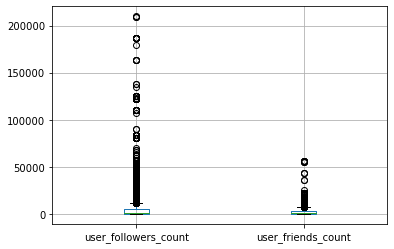

In [53]:
boxplot2 = df_mpp.boxplot(column=['user_followers_count', 'user_friends_count'])

Outliers exist form both columns

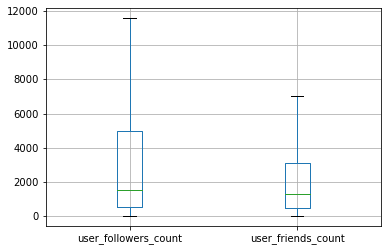

In [54]:
boxplot2 = df_mpp.boxplot(column=['user_followers_count', 'user_friends_count'], showfliers=False)

# ZKH File

In [55]:
df_zkh = pd.read_excel('ZKH.xlsx')

In [56]:
df_zkh.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str'],
      dtype='object')

In [57]:
df_zkh.size

60228

In [58]:
df_zkh.columns == df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [59]:
len(df_zkh.from_user.unique())

1819

### Null

In [60]:
df_zkh.isnull().mean()

id_str                       0.000000
from_user                    0.000000
text                         0.000000
created_at                   0.000000
time                         0.000000
geo_coordinates              1.000000
user_lang                    1.000000
in_reply_to_user_id_str      0.853556
in_reply_to_screen_name      0.853556
from_user_id_str             0.000000
in_reply_to_status_id_str    0.854154
source                       0.000000
profile_image_url            0.000000
user_followers_count         0.001195
user_friends_count           0.000000
user_location                0.362821
status_url                   0.000000
entities_str                 0.000000
dtype: float64

In [61]:
df_zkh.drop(df_zkh.columns[(df_zkh.isnull().mean() > 0.8)], axis=1, inplace=True)

In [62]:
df_zkh.isnull().sum()

id_str                     0
from_user                  0
text                       0
created_at                 0
time                       0
from_user_id_str           0
source                     0
profile_image_url          0
user_followers_count       4
user_friends_count         0
user_location           1214
status_url                 0
entities_str               0
dtype: int64

### Souce Txt

In [63]:
df_zkh['source_txt'] = df_zkh.source.str.findall('\>(.+)\<').apply(lambda x: x[0] if x else '')

In [64]:
df_zkh.source_txt.value_counts()

Twitter for Android    1491
Twitter for iPhone     1364
Twitter Web App         428
Twitter for iPad         45
botmn                    11
TweetDeck                 5
ContestTwitterMN          1
Buffer                    1
Name: source_txt, dtype: int64

Does not have as much source as DP and MPP files

### Basic EDA

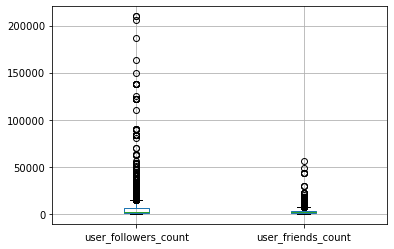

In [65]:
boxplot3 = df_zkh.boxplot(column=['user_followers_count', 'user_friends_count'])

Outliers exist in both columns

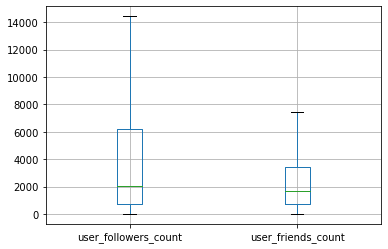

In [66]:
boxplot3 = df_zkh.boxplot(column=['user_followers_count', 'user_friends_count'], showfliers=False)